# Investors, optimal portfolios and indifference curves

In [1]:
from pyvest import InvestmentUniverse
from pyvest import YFDataReader

## Investment universe

### Download historical data

In [2]:
data_reader = YFDataReader()

assets = ["KO", "MSFT", "WMT"]
start_date = "1992-12-31"
end_date = "2022-12-31"

monthly_returns_df = data_reader.read_returns(assets, start_date, end_date)

### Estimate expected returns and variance-covariance matrix

In [3]:
mu_hat = monthly_returns_df.mean()
cov_hat = monthly_returns_df.cov()

### Construct the investment universe

In [4]:
investment_universe = InvestmentUniverse(assets, mu_hat, cov_hat, r_f=0.25, min_weight=-0.5)

### Add investors

In [5]:
investment_universe.add_investor(2000, portfolio=[0.2, 0.3, 0.25, 0.25], gamma=0.015, name="Bob")
investment_universe.add_investor(5000, gamma=0.012)
investment_universe.add_investor(3000, gamma=0.025)
investment_universe.add_investor(6000, gamma=0.02)
investment_universe.add_investor(2500, gamma=0.025)

wealth: 2500.0
gamma: 0.025
portfolio:
  -weights: [0.2341, 0.3439, 0.1709, 0.251]
  -expected return: 1.0272
  -standard deviation: 3.9432
  -utility:: 0.6385347655564595

## Market portfolio

In [6]:
investment_universe.investors

{'Bob': wealth: 2000.0
 gamma: 0.015
 portfolio:
   -weights: {'KO': 0.2, 'MSFT': 0.3, 'WMT': 0.25, 'r_f': 0.25}
   -expected return: 0.994
   -standard deviation: 3.8112
   -utility:: 0.7761066275467788,
 'Investor 1': wealth: 5000.0
 gamma: 0.012
 portfolio:
   -weights: [0.4873, 0.7166, 0.3563, -0.5602]
   -expected return: 1.8692
   -standard deviation: 8.2147
   -utility:: 1.0594473919277978,
 'Investor 2': wealth: 3000.0
 gamma: 0.025
 portfolio:
   -weights: [0.2341, 0.3439, 0.1709, 0.251]
   -expected return: 1.0272
   -standard deviation: 3.9432
   -utility:: 0.6385347655564595,
 'Investor 3': wealth: 6000.0
 gamma: 0.02
 portfolio:
   -weights: [0.2925, 0.4299, 0.2136, 0.064]
   -expected return: 1.2214
   -standard deviation: 4.928
   -utility:: 0.7356684906099469,
 'Investor 4': wealth: 2500.0
 gamma: 0.025
 portfolio:
   -weights: [0.2341, 0.3439, 0.1709, 0.251]
   -expected return: 1.0272
   -standard deviation: 3.9432
   -utility:: 0.6385347655564595}

In [7]:
investment_universe.total_wealth

In [8]:
investment_universe.calculate_market_portfolio()

weights: {'KO': 0.3088, 'MSFT': 0.4546, 'WMT': 0.2366, 'r_f': 0.0}
expected return: 1.2842
standard deviation: 5.247

## Optimal portfolio

In [9]:
bob_investor = investment_universe.investors["Bob"]
bob_investor

wealth: 2000.0
gamma: 0.015
portfolio:
  -weights: {'KO': 0.2, 'MSFT': 0.3, 'WMT': 0.25, 'r_f': 0.25}
  -expected return: 0.994
  -standard deviation: 3.8112
  -utility:: 0.7761066275467788

In [10]:
bob_investor.portfolio_utility

0.7761066275467788

In [11]:
bob_investor.calculate_optimal_portfolio()

weights: [0.3902, 0.5729, 0.2849, -0.248]
expected return: 1.5449
standard deviation: 6.5694

In [12]:
bob_investor.optimal_portfolio_utility

0.8975579047975603

## Plot investment universe and indifference curves

### Plot investment universe

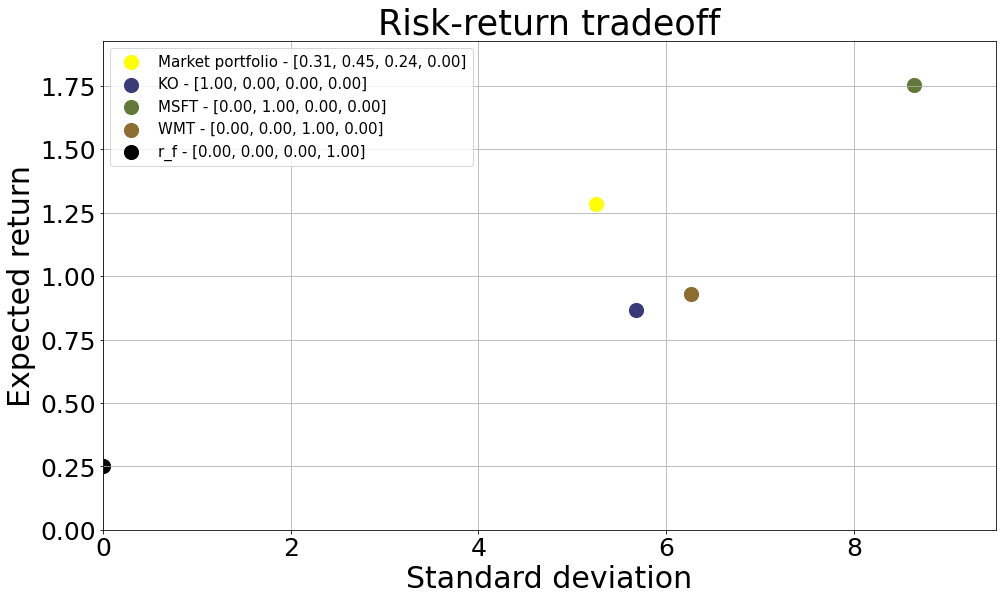

In [13]:
investment_universe.plot()

### Plot indifference curves

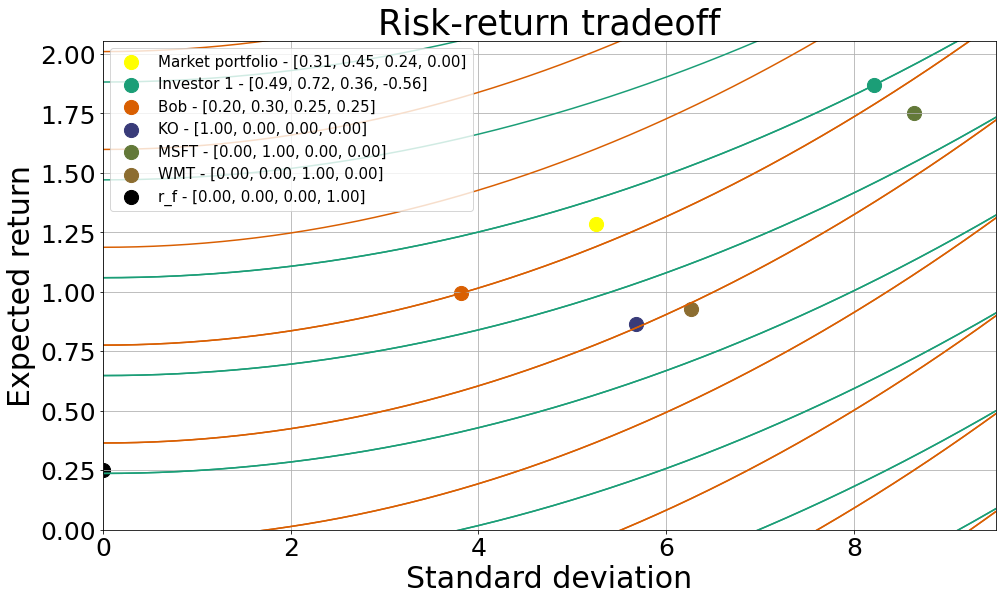

In [14]:
investment_universe.plot(investors=["Investor 1", "Bob"], indifference_curves=["Investor 1", "Bob"])

### Add portfolios

In [15]:
investment_universe.calculate_feasible_portfolios()

In [16]:
investment_universe.calculate_efficient_frontier()

In [17]:
investment_universe.calculate_mvp()

weights: {'KO': 0.4926, 'MSFT': 0.1558, 'WMT': 0.3516, 'r_f': 0.0}
expected return: 1.0262
standard deviation: 4.5535

In [18]:
investment_universe.calculate_tangency_portfolio()

weights: {'KO': 0.3126, 'MSFT': 0.4593, 'WMT': 0.2281, 'r_f': 0.0}
expected return: 1.2878
standard deviation: 5.2652

In [19]:
investment_universe.calculate_cal()

In [20]:
investment_universe.calculate_portfolio([0.0,0.4,0.3,0.3])

weights: {'KO': 0.0, 'MSFT': 0.4, 'WMT': 0.3, 'r_f': 0.3}
expected return: 1.0553
standard deviation: 4.3223

In [21]:
investment_universe.visualizer.nb_decimal_places = 2

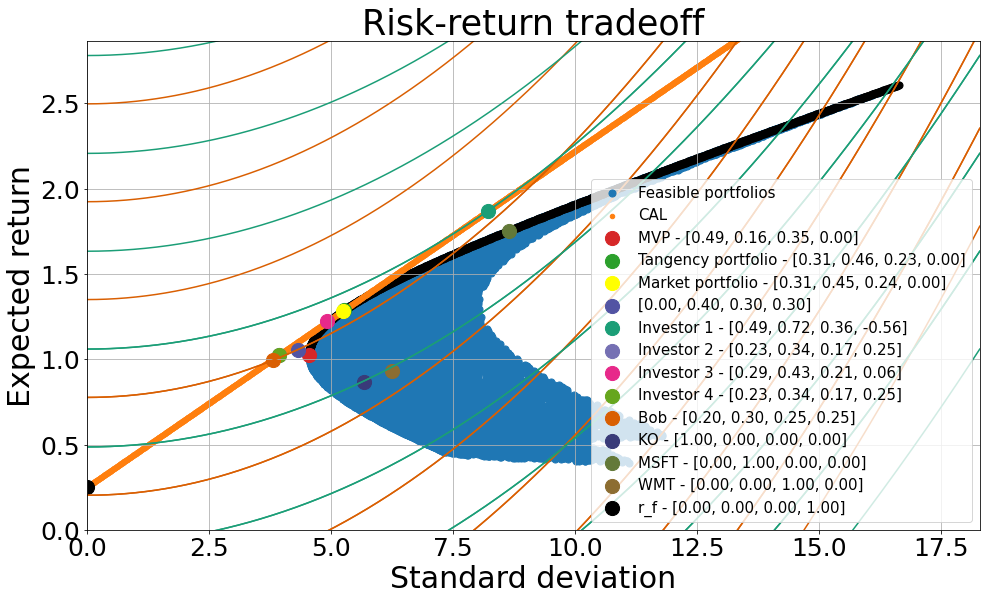

In [22]:
investment_universe.plot(investors=["Investor 1", "Investor 2", "Investor 3", "Investor 4", "Bob"], indifference_curves=["Bob", "Investor 1"], legend='best')

### Plot feasible portfolios with respect to the risk-free asset

In [23]:
investment_universe.calculate_feasible_portfolios_with_r_f()

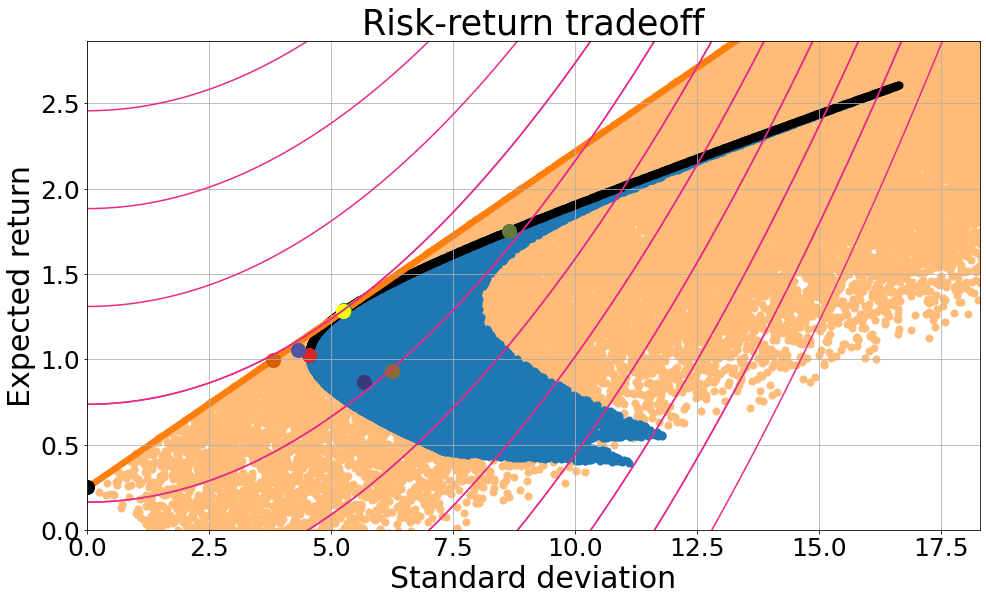

In [24]:
investment_universe.plot(investors=["Bob"], indifference_curves=["Investor 3"], legend=None)